# Universidade de Fortaleza
Mestrado em Ciência de Dados e Inteligência Artificial

Professor: Daniel Macedo

Aluno: Marcus Miranda

### Desafio
1) Rotacionar a Imagem deixando ela alinhada ao eixo;

2) Realizar a leitura do OCR 

### Bibliotecas Utilizadas

In [1]:
import pytesseract as ocr
from PIL import Image
import cv2
import numpy as np
from IPython.display import Image
import re
import matplotlib.pyplot as plt
ocr.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

### Figura atual

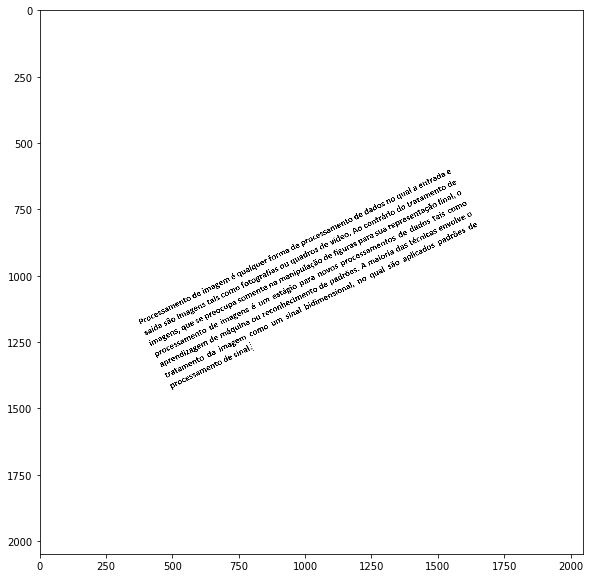

In [2]:
imagem = cv2.imread('texto_pi.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(imagem)

### O que se espera da Figura após o tramento:

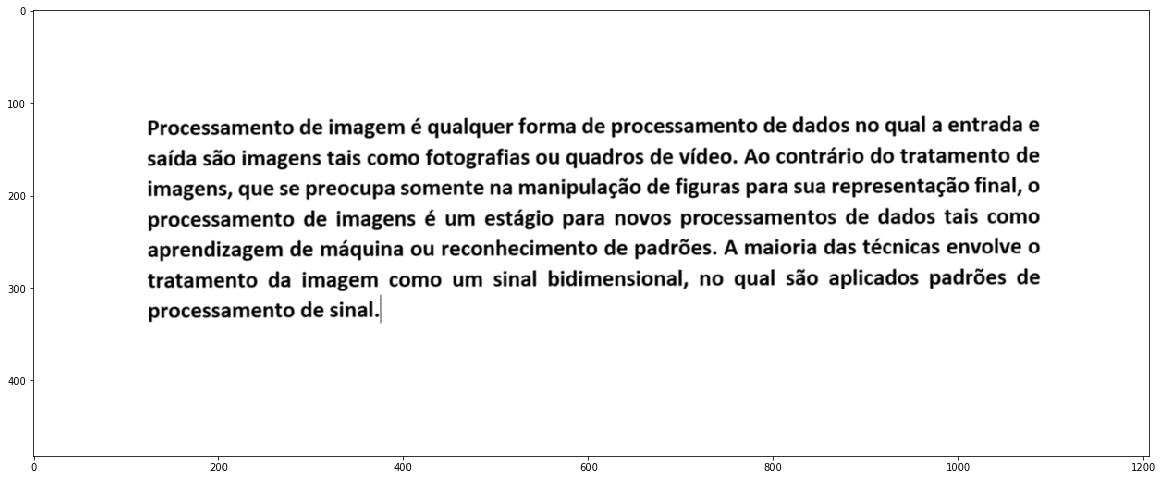

In [3]:
img = cv2.imread('fotovirada.png')
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(img)

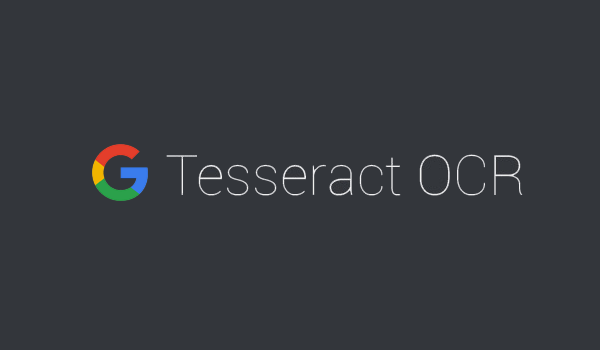

### Para fazer este trabalho iremos utilizar a biblioteca Pytesseract

python-tesseract é uma ferramenta de reconhecimento óptico de caracteres (OCR) para python. Ou seja, ele reconhecerá e “lerá” o texto embutido nas imagens.

Python-tesseract é um wrapper para o mecanismo Tesseract-OCR do Google . Também é útil como um script de invocação independente para tesseract, pois pode ler todos os tipos de imagem suportados pelas bibliotecas de imagens Pillow e Leptonica, incluindo jpeg, png, gif, bmp, tiff e outros. Além disso, se usado como um script, o Python-tesseract imprimirá o texto reconhecido em vez de gravá-lo em um arquivo.

### Funções disponiveis

get_tesseract_version Retorna a versão do Tesseract instalada no sistema

image_to_string Retorna o resultado de um Tesseract OCR executado na imagem para a string

image_to_boxes Retorna o resultado contendo caracteres reconhecidos e seus limites de caixa

image_to_data Retorna o resultado contendo os limites da caixa, confidências e outras informações. Requer Tesseract 3.05+. Para obter mais informações, consulte a documentação Tesseract TSV

image_to_osd Retorna o resultado contendo informações sobre orientação e detecção de script.

image_to_alto_xml Retorna o resultado na forma do formato ALTO XML do Tesseract.

run_and_get_output Retorna a saída bruta do Tesseract OCR. Dá um pouco mais de controle sobre os parâmetros que são enviados para o tesseract.


In [4]:
import pkg_resources
pkg_resources.working_set.by_key['pytesseract'].version

#print(get_tesseract_version)

'0.3.6'

### Ajustando na mão a rotação da figura

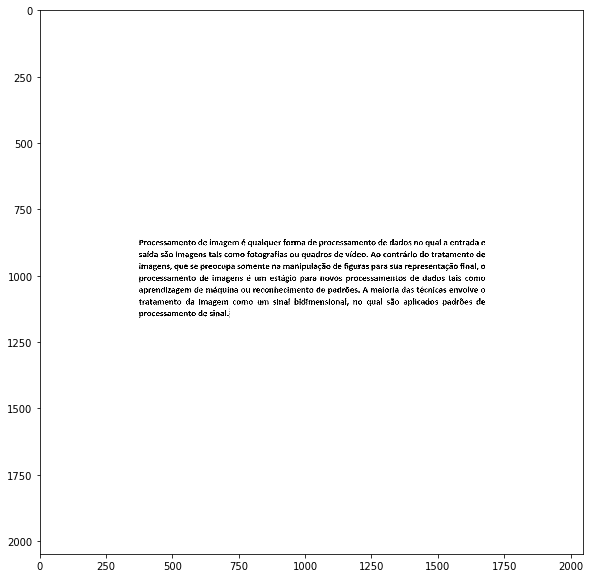

In [5]:
from PIL import Image
im = Image.open("texto_pi.png")

_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(im.rotate(-26))

### Centralizando o Texto da figura

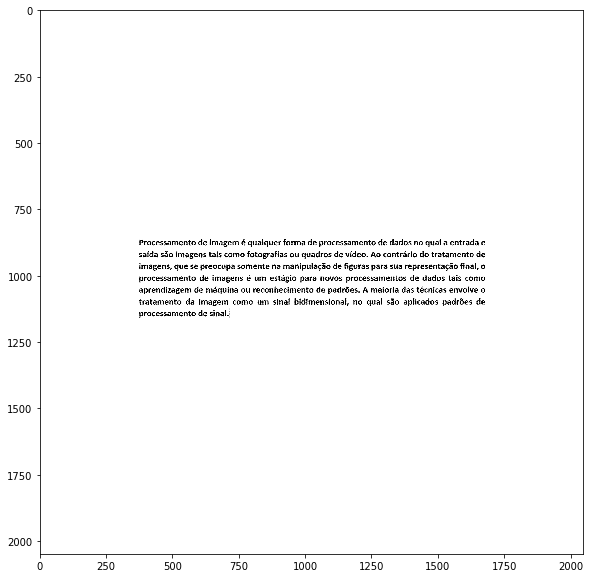

In [6]:
imagem1 = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem2 = cv2.bitwise_not(imagem1)
imagem3 = cv2.threshold(imagem2,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
coordenadas = np.column_stack(np.where(imagem3>0))
angulo = cv2.minAreaRect(coordenadas)[-1]
if angulo < -45:
    angulo = -(90 + angulo)
else:
    angulo = -angulo
    
im = Image.open("texto_pi.png")
_, ax1 = plt.subplots(figsize=(20,10))
ax1.imshow(im.rotate(angulo))

### Fazendo a Leitura do texto em OCR

-Faça o download do pacote de idiomas tesseract para o português aqui:
https://github.com/tesseract-ocr/tessdata/blob/master/por.traineddata
    
Nome da variavel de ambiente: TESSDATA_PREFIX
diretorio: D:\JupyterNotebook\6 - Disciplina de Imagens\Desafio 3\Idiomas

In [7]:
Texto = ocr.image_to_string(im.rotate(angulo), lang='por')
print(Texto)

Processamento de imagem é qualquer forma de processamento de dados no qual a entrada e
saída são imagens tais como fotografias ou quadros de vídeo. Ao contrário do tratamento de
imagens, que se preocupa somente na manipulação de figuras para sua representação final, o
processamento de imagens é um estágio para novos processamentos de dados tais como
aprendizagem de máquina ou reconhecimento de padrões. A maioria das técnicas envolve o
tratamento da imagem como um sinal bidimensional, no qual são aplicados padrões de
processamento de sinal.



In [8]:
Texto = ocr.image_to_osd(im.rotate(angulo), lang='por')
print(Texto)

Page number: 0
Orientation in degrees: 270
Rotate: 90
Orientation confidence: 250.00
Script: Latin
Script confidence: 2.00



In [9]:
Texto = ocr.image_to_data(im.rotate(angulo), lang='por')
print(Texto)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	2048	2048	-1	
2	1	1	0	0	0	372	862	1304	299	-1	
3	1	1	1	0	0	372	862	1304	299	-1	
4	1	1	1	1	0	374	862	1302	31	-1	
5	1	1	1	1	1	374	865	213	21	95	Processamento
5	1	1	1	1	2	596	863	33	23	96	de
5	1	1	1	1	3	638	864	111	28	96	imagem
5	1	1	1	1	4	758	863	15	23	95	é
5	1	1	1	1	5	782	863	126	30	95	qualquer
5	1	1	1	1	6	915	863	84	24	96	forma
5	1	1	1	1	7	1008	863	34	24	96	de
5	1	1	1	1	8	1051	865	213	27	95	processamento
5	1	1	1	1	9	1273	863	33	23	96	de
5	1	1	1	1	10	1316	862	83	24	96	dados
5	1	1	1	1	11	1409	869	33	17	96	no
5	1	1	1	1	12	1451	863	59	29	96	qual
5	1	1	1	1	13	1520	869	14	18	96	a
5	1	1	1	1	14	1544	862	108	24	96	entrada
5	1	1	1	1	15	1661	870	15	16	96	e
4	1	1	1	2	0	373	907	1303	30	-1	
5	1	1	1	2	1	373	907	71	24	96	saída
5	1	1	1	2	2	454	907	47	24	96	são
5	1	1	1	2	3	511	908	115	29	95	imagens
5	1	1	1	2	4	635	909	49	22	96	tais
5	1	1	1	2	5	694	914	76	18	96	como
5	1	1	1	2	6	779	907	152	30	96	fotografias

In [10]:
Texto = ocr.image_to_alto_xml(Image.open('fotovirada.png'), lang='por')
print(Texto)

b'<?xml version="1.0" encoding="UTF-8"?>\n<alto xmlns="http://www.loc.gov/standards/alto/ns-v3#" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.loc.gov/standards/alto/ns-v3# http://www.loc.gov/alto/v3/alto-3-0.xsd">\n\t<Description>\n\t\t<MeasurementUnit>pixel</MeasurementUnit>\n\t\t<sourceImageInformation>\n\t\t\t<fileName></fileName>\n\t\t</sourceImageInformation>\n\t\t<OCRProcessing ID="OCR_0">\n\t\t\t<ocrProcessingStep>\n\t\t\t\t<processingSoftware>\n\t\t\t\t\t<softwareName>tesseract v5.0.0-alpha.20201127</softwareName>\n\t\t\t\t</processingSoftware>\n\t\t\t</ocrProcessingStep>\n\t\t</OCRProcessing>\n\t</Description>\n\t<Layout>\n\t\t<Page WIDTH="1207" HEIGHT="482" PHYSICAL_IMG_NR="0" ID="page_0">\n\t\t\t<PrintSpace HPOS="0" VPOS="0" WIDTH="1207" HEIGHT="482">\n\t\t\t\t<ComposedBlock ID="cblock_0" HPOS="124" VPOS="114" WIDTH="965" HEIGHT="223">\n\t\t\t\t\t<TextBlock ID="block_0" HPOS="124" VPOS="114" W